In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
dt_qzvpp=pd.read_pickle('data_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_def2_tzvp')
dt_sto3g=pd.read_pickle("data_sto3G")
dt_sto6g=pd.read_pickle("data_sto6G")
dt_321g=pd.read_pickle("data_321G")
dt_631g=pd.read_pickle("data_631G")
dt_aug=pd.read_pickle("data_aug")
dt_ccpvtz=pd.read_pickle("data_ccpvtz")

molecules=['HAl','HeMg','LiNa','BeNe','BF','CO','NN']


In [3]:
dfp=dt_aug.copy()
q=[]
for ref in molecules:
    for target in molecules:
        dfp4=dfp.query("alchemy==4 & delta_rho<7 & ref==@ref & target==@target ")
        if np.isnan((dfp4.e_alch-dfp4.e_at_ref_bs).median()):continue  # delta_rho >7
        if ((dfp4.e_alch-dfp4.e_at_ref_bs).median())<.1:continue     # accurate prediction
            
        q.append([ref,target,(dfp4.e_alch-dfp4.e_at_ref_bs).median(),(dfp4.e_at_ref_bs-dfp4.e_ccsd).median()])

In [4]:
dfp4=dt_qzvpp.query("alchemy==4  & distance==2.0 ").copy()
dfp4

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch
39,4,2.0,def2-QZVPP,-202.200098,-202.229401,HAl,HeMg,0.029302,3.907316,-202.199688,-0.000410
139,4,2.0,def2-QZVPP,-168.552920,-168.941206,HAl,LiNa,0.388286,6.402477,-168.759058,0.206138
239,4,2.0,def2-QZVPP,-140.055445,-143.184559,HAl,BeNe,3.129113,8.709267,-141.948507,1.893062
339,4,2.0,def2-QZVPP,-112.486835,-124.460468,HAl,BF,11.973633,9.853446,-121.247719,8.760884
439,4,2.0,def2-QZVPP,-77.578615,-113.157722,HAl,CO,35.579107,11.275946,-106.328314,28.749699
539,4,2.0,def2-QZVPP,-21.803966,-109.380846,HAl,NN,87.576879,12.823985,-97.037572,75.233606
639,4,2.0,def2-QZVPP,-242.151282,-242.380895,HeMg,HAl,0.229612,3.907316,-242.124415,-0.026867
739,4,2.0,def2-QZVPP,-168.669448,-168.941206,HeMg,LiNa,0.271758,3.623346,-168.813683,0.144235
839,4,2.0,def2-QZVPP,-139.399012,-143.184559,HeMg,BeNe,3.785547,6.502722,-142.398013,2.999001
939,4,2.0,def2-QZVPP,-103.238028,-124.460468,HeMg,BF,21.222440,8.533837,-122.871105,19.633077


In [5]:
dfp4

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch
39,4,2.0,def2-QZVPP,-202.200098,-202.229401,HAl,HeMg,0.029302,3.907316,-202.199688,-0.000410
139,4,2.0,def2-QZVPP,-168.552920,-168.941206,HAl,LiNa,0.388286,6.402477,-168.759058,0.206138
239,4,2.0,def2-QZVPP,-140.055445,-143.184559,HAl,BeNe,3.129113,8.709267,-141.948507,1.893062
339,4,2.0,def2-QZVPP,-112.486835,-124.460468,HAl,BF,11.973633,9.853446,-121.247719,8.760884
439,4,2.0,def2-QZVPP,-77.578615,-113.157722,HAl,CO,35.579107,11.275946,-106.328314,28.749699
539,4,2.0,def2-QZVPP,-21.803966,-109.380846,HAl,NN,87.576879,12.823985,-97.037572,75.233606
639,4,2.0,def2-QZVPP,-242.151282,-242.380895,HeMg,HAl,0.229612,3.907316,-242.124415,-0.026867
739,4,2.0,def2-QZVPP,-168.669448,-168.941206,HeMg,LiNa,0.271758,3.623346,-168.813683,0.144235
839,4,2.0,def2-QZVPP,-139.399012,-143.184559,HeMg,BeNe,3.785547,6.502722,-142.398013,2.999001
939,4,2.0,def2-QZVPP,-103.238028,-124.460468,HeMg,BF,21.222440,8.533837,-122.871105,19.633077


In [51]:
def plotsc(data,ax,title,xlims,ylims,legend=False):
    dfp=data
    for ref in molecules:
        for target in molecules:
            if target==ref: continue
            dfp0=dfp.query("alchemy==0 & delta_rho<7 & ref==@ref & target==@target ")
            dfp1=dfp.query("alchemy==1 & delta_rho<7 & ref==@ref & target==@target ")
            dfp2=dfp.query("alchemy==2 & delta_rho<7 & ref==@ref & target==@target ")
            dfp3=dfp.query("alchemy==3 & delta_rho<7 & ref==@ref & target==@target ")
            dfp4=dfp.query("alchemy==4 & delta_rho<7 & ref==@ref & target==@target ")

            #plt.scatter((dfp0.e_at_ref_bs-dfp0.e_ccsd).median(),(dfp0.e_alch-dfp0.e_ccsd).median(),color='C0 & distance<2.5',marker='o')
            pts1=ax.scatter((dfp1.e_at_ref_bs-dfp1.e_ccsd).median(),(dfp1.e_alch-dfp1.e_ccsd).median(),color='C1',marker='|')
            pts2=ax.scatter((dfp2.e_at_ref_bs-dfp2.e_ccsd).median(),(dfp2.e_alch-dfp2.e_ccsd).median(),color='C2',marker='x')
            pts3=ax.scatter((dfp3.e_at_ref_bs-dfp3.e_ccsd).median(),(dfp3.e_alch-dfp3.e_ccsd).median(),color='C3',marker='^')
            pts4=ax.scatter((dfp4.e_at_ref_bs-dfp4.e_ccsd).median(),(dfp4.e_alch-dfp4.e_ccsd).median(),color='C4',marker='s')
    
    ax.set_xlim(*xlims)
    ax.set_ylim(*ylims)

    ax.tick_params(labelsize=20) 
    if legend:
        ax.legend((pts1,pts2,pts3,pts4),('$1^{st}$ ','$2^{nd}$ ','$3^{rd}$ ','$4^{th}$ '),\
                  fontsize=18,handletextpad=0.1,loc=2,markerscale=2.)
    
    ax.plot(ax.get_xlim(),ax.get_xlim()) # diagonal line
    
    ax.set_title(title,fontsize=20,)
    

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as 

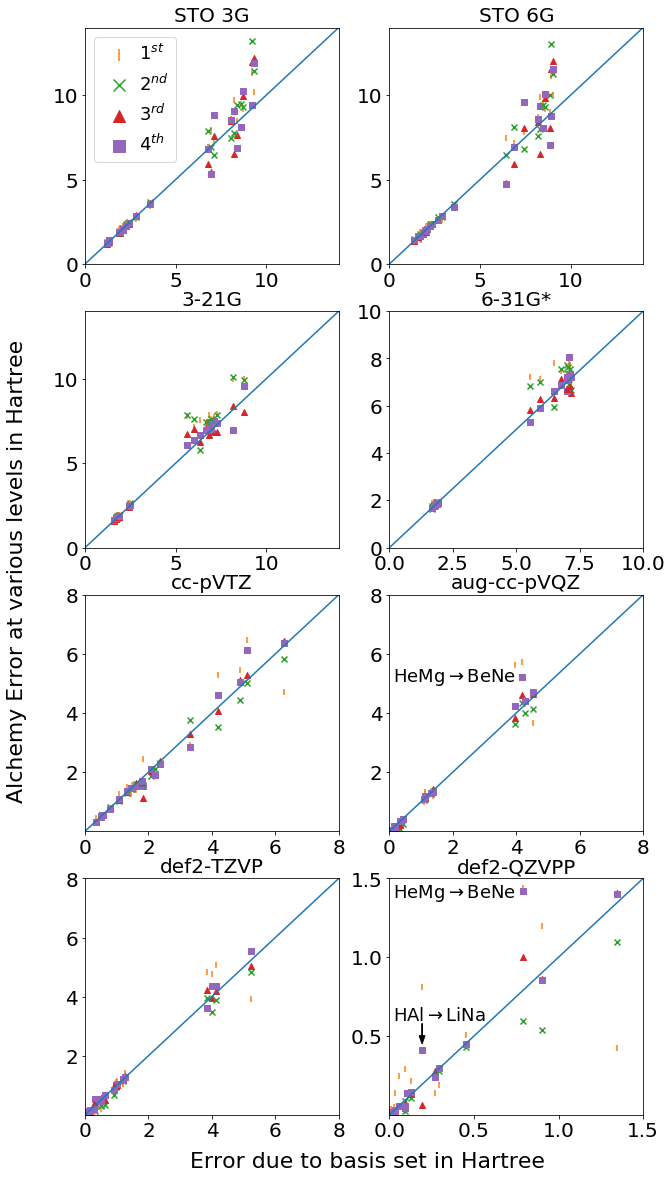

In [53]:
fig=plt.figure(figsize=(10,20))

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel(r'Alchemy Error at various levels in Hartree' ,fontsize=22,labelpad=35)
plt.axes().set_xlabel(r' Error due to basis set in Hartree',fontsize=22,labelpad=20)
plt.axes().set_frame_on(False)

axs=fig.subplots(4,2)
plotsc(dt_sto3g,axs[0][0],"STO 3G",[0,14],[0,14]  ,legend=True)
plotsc(dt_sto6g,axs[0][1],"STO 6G",[0,14],[0,14])
plotsc(dt_321g,axs[1][0],"3-21G",[0,14],[0,14])
plotsc(dt_631g,axs[1][1],"6-31G*",[0,10],[0,10])
plotsc(dt_ccpvtz,axs[2][0],"cc-pVTZ",[0,8],[0,8])
plotsc(dt_aug,axs[2][1],"aug-cc-pVQZ",[0,8],[0,8])
plotsc(dt_tzvp,axs[3][0],"def2-TZVP",[0,8],[0,8])
plotsc(dt_qzvpp,axs[3][1],"def2-QZVPP",[0,1.5],[0,1.5])
#
# setting ticks 
axs[2][0].set_yticks([2,4,6,8])
axs[2][1].set_yticks([2,4,6,8])
axs[3][0].set_yticks([2,4,6,8])
axs[3][1].set_yticks([.5,1.,1.5])

# some remarkable point
axs[3][1].text(.02,1.38,r"HeMg$ \rightarrow $BeNe" ,fontsize=18)
#axs[3][1].arrow( .53, 1.42,.21 ,0.  ,length_includes_head=True,head_width=.035,color='black')
axs[3][1].text(.02,.6,r"HAl$ \rightarrow $LiNa",fontsize=18)
axs[3][1].arrow(.193, .58,0.,-.13 ,length_includes_head=True,head_width=.035,color='black')

axs[2][1].text(.1,5.06,r"HeMg$ \rightarrow $BeNe",fontsize=18)
#axs[2][1].arrow(3,5.2,1 ,0.  ,length_includes_head=True,head_width=.16,color='black')


plt.savefig("Scatterplot_alchemy_vs_BasisSet.pdf")

In [ ]:
"""
remakabily error for def2-QZVPP:  # e_alch-e_at_ref_bs // err for ref bs

[['HAl', 'LiNa', 0.2241467843737439, 0.19195201984700816],
 ['HeMg','BeNe' 0.6320680405137438, 0.792689445766996]]

for aug-ccpVQZ
['HeMg', 'BeNe', 0.9959166804261201, 4.1921136679799815]
 """

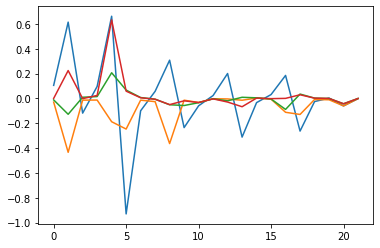

In [17]:
dfp=dt_qzvpp.copy()
pts1,pts2,pts3,pts4=[],[],[],[]
for ref in molecules:
    for target in molecules:
        if target==ref: continue
        dfp1=dfp.query("alchemy==1 & delta_rho<7 & ref==@ref & target==@target")
        dfp2=dfp.query("alchemy==2 & delta_rho<7 & ref==@ref & target==@target")
        dfp3=dfp.query("alchemy==3 & delta_rho<7 & ref==@ref & target==@target")
        dfp4=dfp.query("alchemy==4 & delta_rho<7 & ref==@ref & target==@target")

        if not np.isnan((dfp1.e_alch-dfp1.e_at_ref_bs).median()) : pts1.append((dfp1.e_alch-dfp1.e_at_ref_bs).median())
        if not np.isnan((dfp2.e_alch-dfp2.e_at_ref_bs).median()) : pts2.append((dfp2.e_alch-dfp2.e_at_ref_bs).median())
        if not np.isnan((dfp3.e_alch-dfp3.e_at_ref_bs).median()) : pts3.append((dfp3.e_alch-dfp3.e_at_ref_bs).median())
        if not np.isnan((dfp4.e_alch-dfp4.e_at_ref_bs).median()) : pts4.append((dfp4.e_alch-dfp4.e_at_ref_bs).median())
plt.plot(list(range(len(pts1))),pts1)
plt.plot(list(range(len(pts1))),pts2)
plt.plot(list(range(len(pts1))),pts3)
plt.plot(list(range(len(pts1))),pts4)

In [8]:
dfp=dt_qzvpp.copy()
pts1,pts2,pts3,pts4=[],[],[],[]
for ref in molecules:
    for target in molecules:
        if target==ref: continue
        dfp1=dfp.query("alchemy==1 & delta_rho<7 & ref==@ref & target==@target")
        dfp2=dfp.query("alchemy==2 & delta_rho<7 & ref==@ref & target==@target")
        dfp3=dfp.query("alchemy==3 & delta_rho<7 & ref==@ref & target==@target")
        dfp4=dfp.query("alchemy==4 & delta_rho<7 & ref==@ref & target==@target")
        for x in list(dfp1.e_alch-dfp1.e_at_ref_bs):
            if not np.isnan(x): 
                pts1.append(x)
        for x in list(dfp2.e_alch-dfp2.e_at_ref_bs):
            if not np.isnan(x): 
                pts2.append(x)
        for x in list(dfp3.e_alch-dfp3.e_at_ref_bs):
            if not np.isnan(x): 
                pts3.append(x)
        for x in list(dfp4.e_alch-dfp4.e_at_ref_bs):
            if not np.isnan(x):
                pts4.append(x)


440 440 440


/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins h

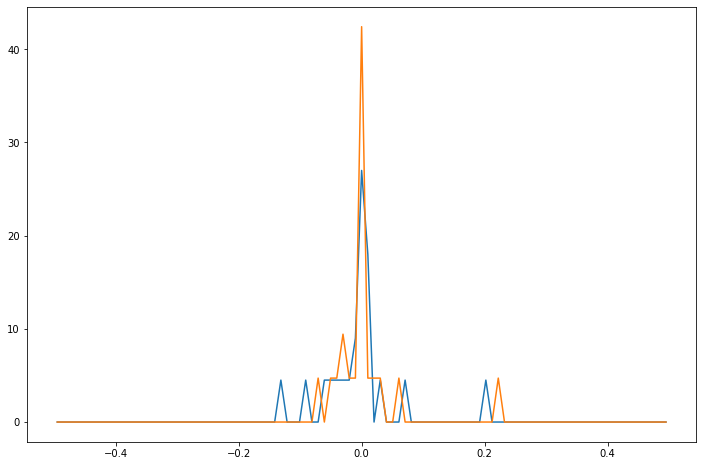

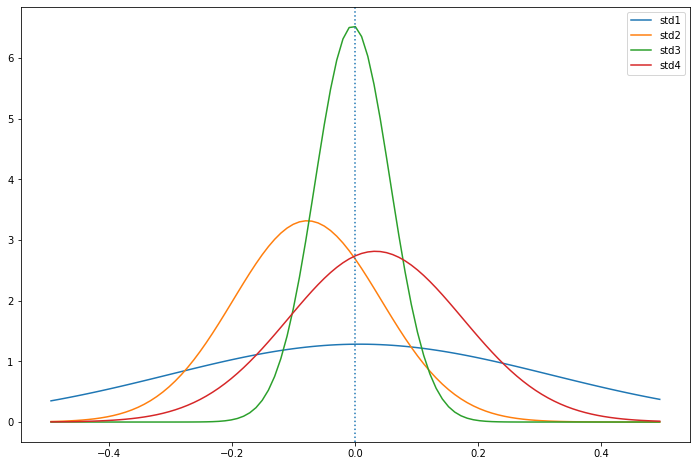

In [21]:
bins0 = np.linspace(-.5, .5, 100)
histogram1, bins1 = np.histogram(pts1, bins=bins0, normed=True)
bin_centers1 = 0.5*(bins1[1:] + bins1[:-1])

histogram2, bins2 = np.histogram(pts2, bins=bins0, normed=True)
bin_centers2 = 0.5*(bins2[1:] + bins2[:-1])
pdf2 = stats.norm.pdf(pts2)
histogram3, bins3 = np.histogram(pts3, bins=bins0, normed=True)
bin_centers3 = 0.5*(bins3[1:] + bins3[:-1])
pdf3 = stats.norm.pdf(bin_centers3)
histogram4, bins4 = np.histogram(pts4, bins=bins0, normed=True)
bin_centers4 = 0.5*(bins4[1:] + bins4[:-1])
pdf4 = stats.norm.pdf(bin_centers4)

plt.figure(figsize=(12,8))

#plt.plot(bin_centers1, histogram1, label="Histogram of samples 1")
#plt.plot(bin_centers2, histogram2, label="Histogram of samples 2")
plt.plot(bin_centers3, histogram3, label="Histogram of samples 3")
plt.plot(bin_centers4, histogram4, label="Histogram of samples 4")
plt.show()

plt.figure(figsize=(12,8))
sigma=np.std(pts1)
mu=np.mean(pts1)
plt.plot(bin_centers1, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bin_centers1 - mu)**2 / (2 * sigma**2)),label='std1')

sigma=np.std(pts2)
mu=np.mean(pts2)
plt.plot(bin_centers2, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bin_centers2 - mu)**2 / (2 * sigma**2) ),label='std2')

sigma=np.std(pts3)
mu=np.mean(pts3)
plt.plot(bin_centers3, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bin_centers3- mu)**2 / (2 * sigma**2) ),label='std3')

sigma=np.std(pts4)
mu=np.mean(pts4)
plt.plot(bin_centers4, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bin_centers4 - mu)**2 / (2 * sigma**2) ),label='std4')
plt.legend()
plt.axvline(0,ls=':')
plt.show()